In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
titanic_data = pd.read_csv('C:/DATA/Titanic-Dataset.csv')

In [3]:
print(f"Filas y columnas: {titanic_data.shape}")

Filas y columnas: (891, 12)


In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Distribución de la Supervivencia')

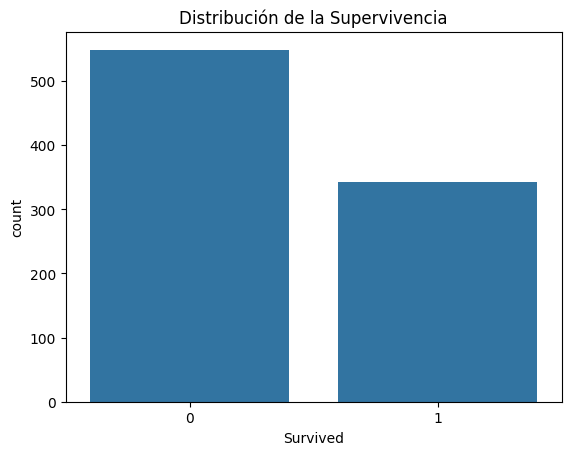

In [8]:
# Analisis EDA
sns.countplot(data=titanic_data, x='Survived')
plt.title("Distribución de la Supervivencia")

Text(0.5, 1.0, 'Distribución de la Edad')

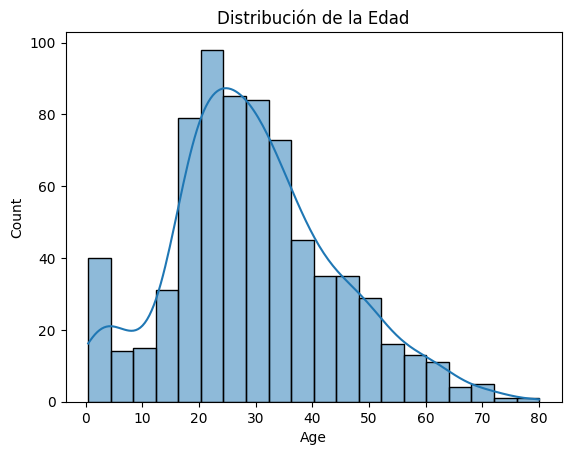

In [9]:
sns.histplot(data=titanic_data, x='Age', kde=True)
plt.title("Distribución de la Edad")

In [10]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

C:\Users\SISTEMAS_PERSONERIA\AppData\Local\Temp\ipykernel_9872\2129876400.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


In [11]:
titanic_data.drop(columns=['Cabin'], inplace=True)

In [12]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

C:\Users\SISTEMAS_PERSONERIA\AppData\Local\Temp\ipykernel_9872\3993763136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [13]:
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [14]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

In [16]:
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Entrenar el modelo
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 200}


In [20]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



<Axes: >

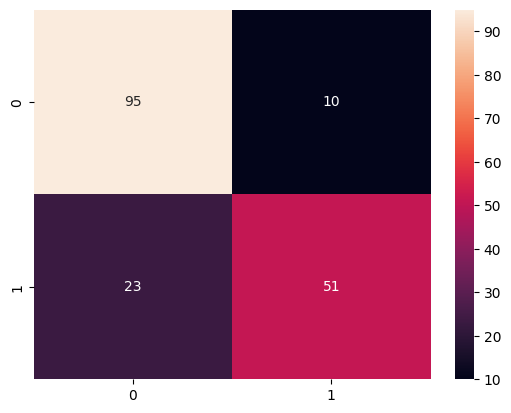

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

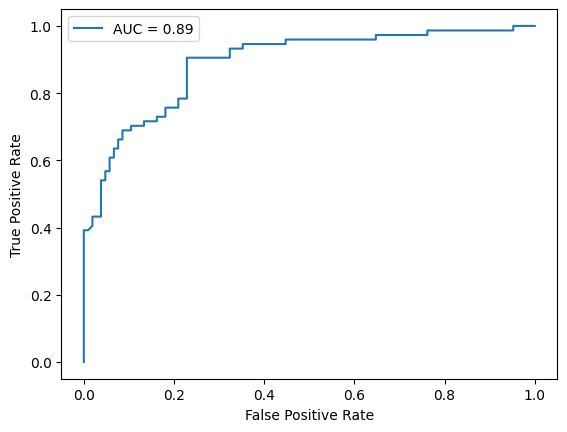

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [23]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)

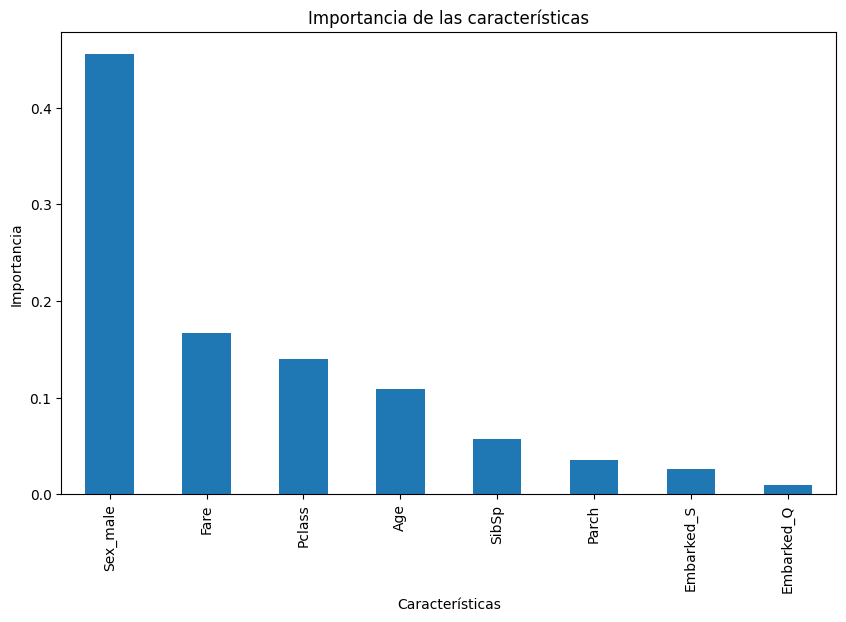

In [24]:
importances.plot(kind='bar', title='Importancia de las características', figsize=(10, 6))
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

In [25]:
print(titanic_data.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [26]:
#Reconstruir valor female para diferenciar mejor
titanic_data['Sex'] = titanic_data['Sex_male'].apply(lambda x: 'male' if x == 1 else 'female')

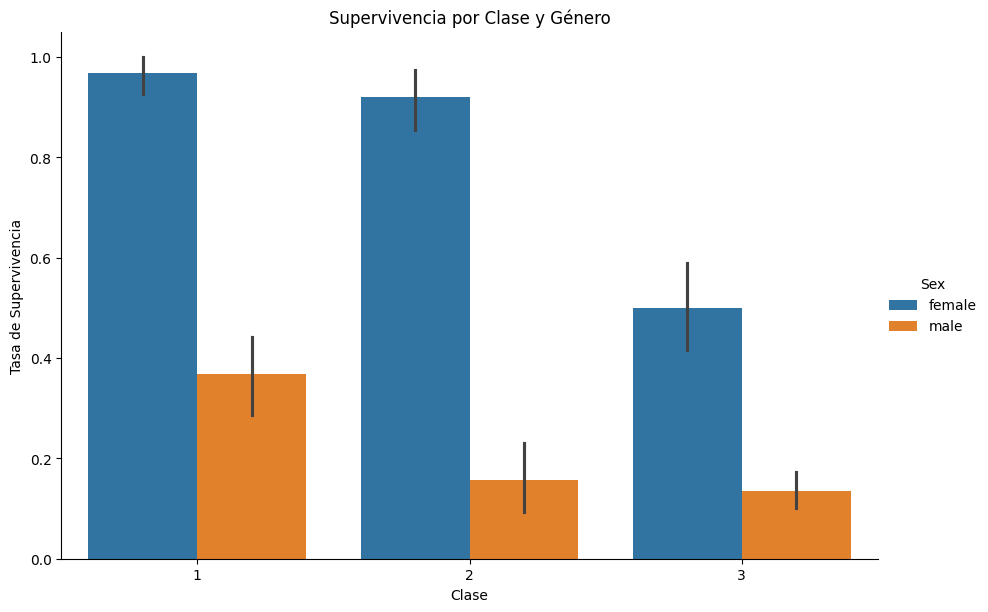

In [27]:
sns.catplot(data=titanic_data, x='Pclass', hue='Sex', y='Survived', kind='bar', height=6, aspect=1.5)
plt.title("Supervivencia por Clase y Género")
plt.ylabel("Tasa de Supervivencia")
plt.xlabel("Clase")
plt.show()

In [28]:
#Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['No Sobrevive', 'Sobrevive']))

#ROC-AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

              precision    recall  f1-score   support

No Sobrevive       0.81      0.90      0.85       105
   Sobrevive       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

ROC-AUC: 0.8902


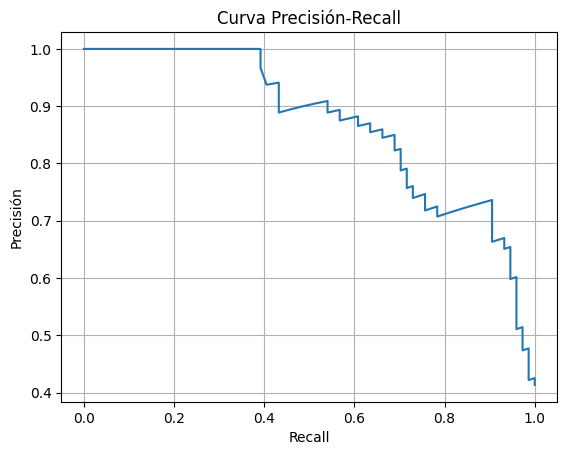

In [29]:
from sklearn.metrics import precision_recall_curve

# Obtener probabilidades de la clase positiva
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular precisión, recall y umbrales
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Graficar curva de precisión vs recall
plt.plot(recalls, precisions)
plt.title("Curva Precisión-Recall")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.grid()
plt.show()


In [30]:


# Ajustar ponderación de clases: mayor peso a la clase 'Sobrevive' (1)
model_weighted = RandomForestClassifier(class_weight={0: 1, 1: 2}, random_state=42)
model_weighted.fit(X_train, y_train)

# Evaluar el modelo ajustado
y_pred_weighted = model_weighted.predict(X_test)
print(classification_report(y_test, y_pred_weighted, target_names=['No Sobrevive', 'Sobrevive']))


              precision    recall  f1-score   support

No Sobrevive       0.84      0.85      0.84       105
   Sobrevive       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

